# Classification

## Problem Statement

In classification algorithms the model is designed to predict the output class/category from some possible categories by providing some input features. Below are some of the examples:

|Question                               |Answers       |
|:--------------------------------------|:-------------|
|Is the email spam?                     |no/yes        |
|Is the transaction fraudulent?         |no/yes        |
|Is the tumor mallignant?               |no/yes        |


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp_X1 = np.array([0, 1, 2, 3, 4, 5])
temp_y1 = np.array([0, 0, 0, 1, 1, 1])
temp_X2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
temp_y2 = np.array([0, 0, 0, 1, 1, 1])


pos1 = temp_y1 == 1
neg1 = temp_y1 == 0

pos2 = temp_y2 == 1
neg2 = temp_y2 == 0
pos2 = pos2.reshape(-1,)  #work with 1D or 1D y vectors
neg2 = neg2.reshape(-1,)

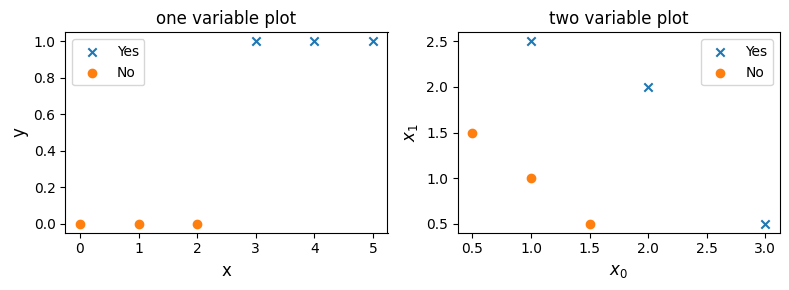

In [3]:
fig,ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].scatter(temp_X1[pos1], temp_y1[pos1], marker='x', label="Yes")
ax[0].scatter(temp_X1[neg1], temp_y1[neg1], marker='o', label="No")

ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()


ax[1].scatter(temp_X2[pos2, 0], temp_X2[pos2, 1], marker='x', label="Yes")
ax[1].scatter(temp_X2[neg2, 0], temp_X2[neg2, 1], marker='o', label="No")
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout(rect=[0,0,1,1])

### Trying linear regression approach

$$f_{w,b}{(X^{i})} = w^{(i)}.X^{(i)} + b$$

In [4]:
from utils.linear_regression import run_gradient_descent, model_function

temp_w1, temp_b1 = run_gradient_descent(temp_X1.reshape(-1,1), temp_y1, np.zeros(1), 0, alpha=0.001, num_iters=100000)
print(f"(w, b) = {(temp_w1, temp_b1)}")

(w, b) = (array([0.25714286]), -0.14285714285707546)


In [5]:
temp_w2, temp_b2 = run_gradient_descent(temp_X2, temp_y2, np.zeros(2), 0, alpha=0.001, num_iters=100000)
print(f"(w, b) = {(temp_w2, temp_b2)}")

(w, b) = (array([0.58601998, 0.56341814]), -1.1301579350535618)


In [6]:
temp_y1_predictions = model_function(temp_X1.reshape(-1,1), temp_w1, temp_b1)
temp_y2_predictions = model_function(temp_X2, temp_w2, temp_b2)

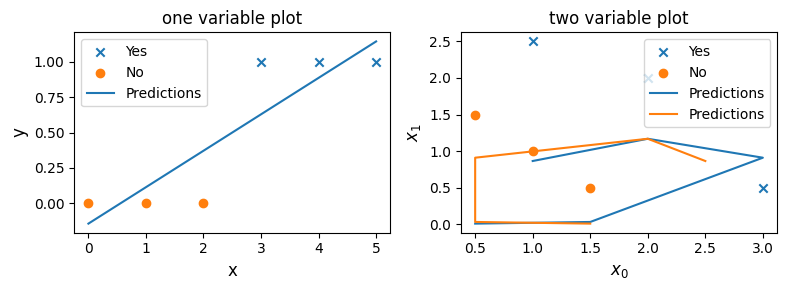

In [7]:
fig,ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].scatter(temp_X1[pos1], temp_y1[pos1], marker='x', label="Yes")
ax[0].scatter(temp_X1[neg1], temp_y1[neg1], marker='o', label="No")
ax[0].plot(temp_X1, temp_y1_predictions, label="Predictions")

ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()


ax[1].scatter(temp_X2[pos2, 0], temp_X2[pos2, 1], marker='x', label="Yes")
ax[1].scatter(temp_X2[neg2, 0], temp_X2[neg2, 1], marker='o', label="No")
ax[1].plot(temp_X2, temp_y2_predictions, label="Predictions")
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout(rect=[0,0,1,1])

We can keep the threshold for X and predict 0 if output is less than threshold else 1. But this will not solve the problem as after we add any new points then the slope may change and hence model predictions will become worse. 

Hence, we can conclude that the linear regression model cannot be used to solve the classification problem. 

### Sigmoid Function

In order to solve the problem, we use the sigmoid function

$$g(z) = \frac{1}{1 + e^{-z}} \tag{1}$$

and,

$$0 <= g(z) <= 1 \tag{1}$$

In [8]:
def sigmoid(z):
    """
    Returns the sigmoid of input

    Args:
        z (vector) : Input
    Output:
        sig (vector): Sigmoid of z
    """

    # np.exp(x) can be used to calculated e^x
    sig = 1 / (1 + np.exp(-z))
    return sig

In [9]:
temp_z = np.linspace(-10,10,1000)
temp_sig_z = sigmoid(temp_z)

Text(0, 0.5, 'Sigmoid of z')

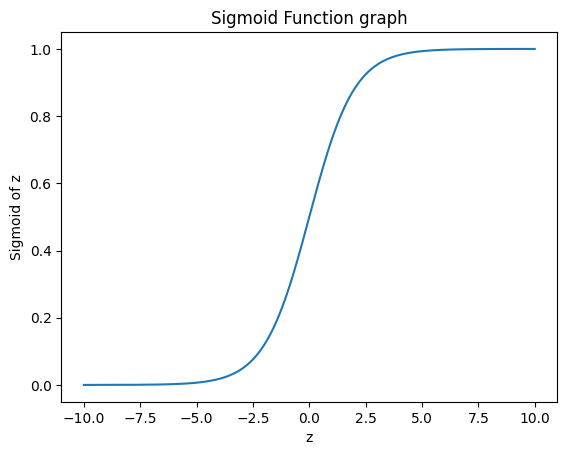

In [10]:
plt.plot(temp_z, temp_sig_z)
# plt.grid(True)
plt.title("Sigmoid Function graph")
plt.xlabel("z")
plt.ylabel("Sigmoid of z")

### Using the sigmoid function to solve the classification problem (Logistic Regression)

Let us store the output of linear regression function in z

$$z = w.x + b \tag{1}$$

Sigmoid function

$$g(z) = \frac{1}{1 + e^{-z}} \tag{2}$$

Putting equation 1 and 2 we get our logistic regression function

$$f_{w,b}(X) = g(z) \tag{3}$$

$$f_{w,b}(X) = \frac{1}{1 + e^{-(w.x + b)}} \tag{1}$$

In [11]:
def classification_model(X, w, b):
    """
    Return output of logistic regression function

    Args:
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    # Use the model function to calculate "w.x + b"
    z = model_function(X, w, b)

    # Applying the logistic regression function
    p = sigmoid(z)
    return p

In [12]:
X = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1, 1])

In [13]:
y_prediction = classification_model(X.reshape(-1, 1), np.array([5]), -12)
y_prediction

array([6.14417460e-06, 9.11051194e-04, 1.19202922e-01, 9.52574127e-01,
       9.99664650e-01, 9.99997740e-01])

The output of the model can be treated as the probablity of that class. If the output is 0.76 then there is 76% change for class 1 that is Yes.

$$f_{(w,b)}(X) = P(y = 1|X;w,b)$$

i.e. probability of y = 1, given input X with model parameters w and b

### Decision boundry

A decision boundary is a line which seperates the output classes, In case of 2 features decision boundry will be that line where all (or most) samples of one class are on one side of that line, and all samples of the other class are on the opposite side of the line.

Let us derive the decision boundry for the above example

f(x) >= threshold
=> g(z) >= threshold
=> z >= 0
=> wx + b >= 0

For our example, w = 5 and b = 12, substituting the values in our equation
=> 5x + 12 >= 0
=> x >= -12/5
=> x >= 2.4

Hence for the above example our decision boundry line is X = 2.4 i.e. if $X^{(i)}$ >= 2.4 then predict 1 else 0

By using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, we can come up with more complex non-linear boundaries.

### Plotting Decision boundry

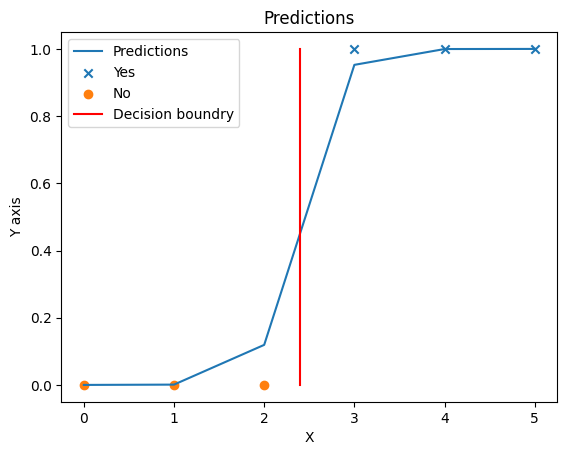

In [14]:

plt.plot(X, y_prediction, label="Predictions")
plt.scatter(X[y == 1], y[y == 1], marker="x", label="Yes")
plt.scatter(X[y == 0], y[y == 0], marker="o", label="No")

# Plotting decision boundry line X = 2.4
plt.plot(np.array([2.4] * 10), np.linspace(0,1,10), label="Decision boundry", color="red")

plt.xlabel("X")
plt.ylabel("Y axis")
plt.title("Predictions")
plt.legend()

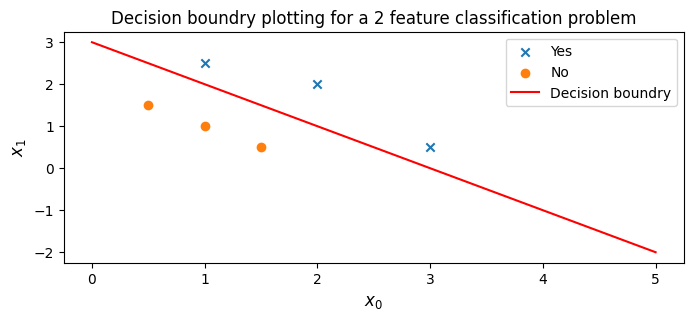

In [16]:
X2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y2 = np.array([0, 0, 0, 1, 1, 1])

fig, ax = plt.subplots(1, 1, figsize=(8,3))

x0 = np.arange(0,6)
x1 = 3 - x0

ax.scatter(X2[y == 1, 0], X2[y == 1, 1], marker='x', label="Yes")
ax.scatter(X2[y == 0, 0], X2[y == 0, 1], marker='o', label="No")

ax.plot(x0, x1, label="Decision boundry", color='red')

ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_title('Decision boundry plotting for a 2 feature classification problem')
ax.legend()